<a href="https://colab.research.google.com/github/kevin-rego/Exploratory-Data-Analysis/blob/main/1stMarch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
%matplotlib inline


In [ ]:
sat_score = pd.read_csv('/content/sat_score.csv')

A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.

Calculate the probability that a student will score less than 800 in SAT exam
Calculate the probability that a student will score more than 1300 in SAT exam
Calculate the minimum marks a student must score in order to secure 90th percentile
Calculate the minimum marks a student must score in order to be in the top 5% **bold text**






In [ ]:
mu = sat_score['score'].mean()
sigma = sat_score['score'].std()

In [ ]:
print(mu)

1007.46


In [ ]:
print(round(sigma,2))

204.43


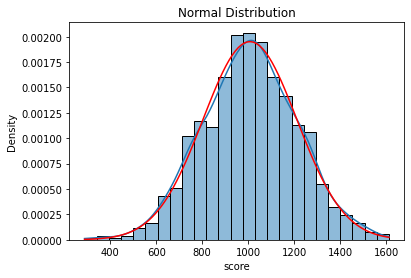

In [ ]:
# calculate the pdf of SAT scores using norm.pdf()
density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(
    sat_score["score"].min(), sat_score["score"].max(), 100
) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], mu, sigma) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

fig, ax = plt.subplots() # create the subplot
sns.histplot(sat_score["score"], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

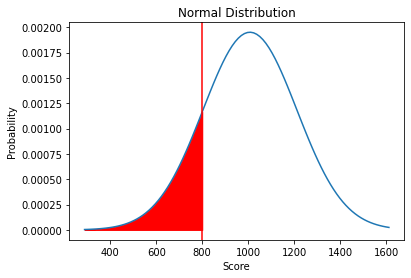

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"]) # plot the pdf of the normal distribution
plt.axvline(x=800, c="r") # draw a red vertical line at x = 800
x1 = np.linspace(density["x"].min(), 800, 50) # create an array of 50 numbers between min SAT score and 800
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r") # fill the specified region with red color
plt.xlabel("Score") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

In [ ]:
prob_less_than_800=norm.cdf(800, mu, sigma)

In [ ]:
prob_less_than_800

0.15509068891539884

In [ ]:
prob_more_than_1300=1 - (norm.cdf(1300, mu, sigma))

In [ ]:
prob_more_than_1300

0.07621063272885598

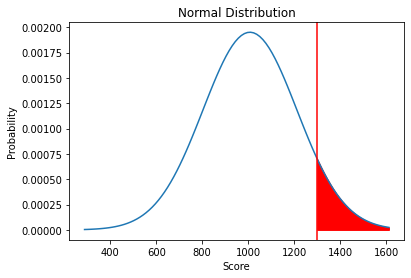

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=1300, c="r")
x1 = np.linspace(1300, density["x"].max(), 50)
plt.fill_between(x1, norm.pdf(x1, mu, sigma), color="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

In [ ]:
score_90th_percentile=norm.ppf(0.90,mu,sigma)

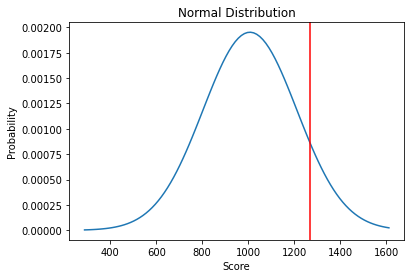

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
plt.plot(density["x"], density["pdf"])
plt.axvline(x=score_90th_percentile, c="r")
plt.xlabel("Score")
plt.ylabel("Probability")
plt.title("Normal Distribution")
plt.show()

**Calculate the minimum marks a student must score in order to be in the top 5%**

In [ ]:
norm.ppf(0.95,mu,sigma)

1343.7108592761278

In [ ]:
mu = 0.295

In [ ]:
sigma = 0.025

a)What is the probability that the pack weighs less than 0.280 kg? 


In [ ]:
norm.cdf(0.280,mu,sigma
         )

0.2742531177500741

b)What is the probability that the pack weighs more than 0.350 kg? 


In [ ]:
1 - (norm.cdf(0.350,mu,sigma
         ))

0.01390344751349859

In [ ]:
#between 0.260 and 0.340
-(norm.cdf(0.260,mu,sigma
         ) -  norm.cdf(0.340,mu,sigma
         ))

0.8833130216533032

# CORRELATION

In [ ]:
experience = [1, 3, 4, 5, 5, 6, 7, 10, 11, 12, 15, 20, 25, 28, 30,35]

salary = [20000, 30000, 40000, 45000, 55000, 60000, 80000, 100000, 130000, 150000, 200000, 230000, 250000, 300000, 350000, 400000]

In [ ]:
import scipy.stats as stats

corr = stats.pearsonr (experience, salary)
corr

(0.9929845761480396, 2.2014339101840284e-14)

In [ ]:
spearman = stats.spearmanr(experience,salary)

In [ ]:
spearman

SpearmanrResult(correlation=0.9992644353546791, pvalue=3.1177734367237602e-21)

In [ ]:
kendall = stats.kendalltau(experience,salary)

In [ ]:
kendall

KendalltauResult(correlation=0.9958246164193105, pvalue=8.179759546382913e-08)

In [ ]:
spearman_corr, _ = stats.spearmanr(experience, salary)
spearman_corr
print(spearman_corr)

kendall_corr, _ = stats.kendalltau(experience, salary)
kendall_corr
print(kendall_corr)

0.9992644353546791
0.9958246164193105


In [ ]:
np.corrcoef(experience, salary)

array([[1.        , 0.99298458],
       [0.99298458, 1.        ]])

In [ ]:
company = pd.read_csv('/content/company.csv')

In [ ]:
company

,name,age,years_in-company,experience,height,children,salary
0,A,30,0.5,1,158,0,20000
1,B,26,2.0,3,140,0,30000
2,C,34,1.0,4,178,1,40000
3,D,40,1.0,5,180,2,45000
4,E,37,2.0,5,190,1,55000
5,F,29,5.0,6,167,0,60000
6,G,39,1.0,7,155,1,80000
7,H,50,8.0,10,170,1,100000
8,I,55,0.2,11,180,2,130000
9,J,40,1.0,12,175,2,150000


In [ ]:
company['experience'].corr(company['salary'])

0.9929845761480398

In [ ]:
company['experience'].corr(company['salary'], method = 'spearman')

0.9992644353546791

In [ ]:
company['experience'].corr(company['salary'], method = 'kendall')

0.9958246164193105

<AxesSubplot:>

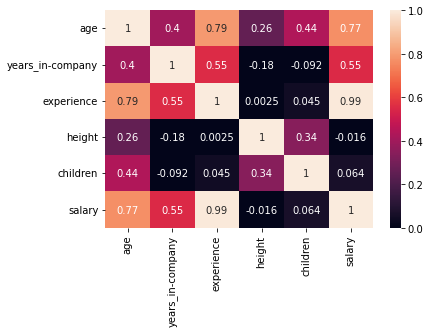

In [ ]:
sns.heatmap(company.corr(), vmin = 0, vmax = 1, annot = True)

In [ ]:
brainFile = 'brainsize.txt'
brainFrame = pd.read_csv(brainFile)
brainFrame

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466


In [ ]:
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [ ]:
mendf= brainFrame[(brainFrame.Gender =='Male')]

In [ ]:
womendf = brainFrame[(brainFrame.Gender =='Female')]

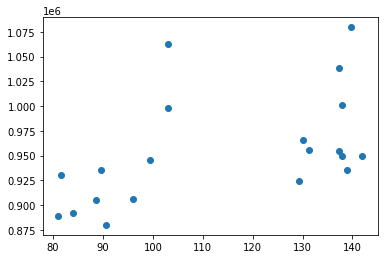

In [ ]:
# Men Scatter Plot
menMeanSmarts = mendf[['PIQ', 'FSIQ', 'VIQ']].mean(axis = 1)
plt.scatter(menMeanSmarts, mendf['MRI_Count'])
plt.show()
%matplotlib inline

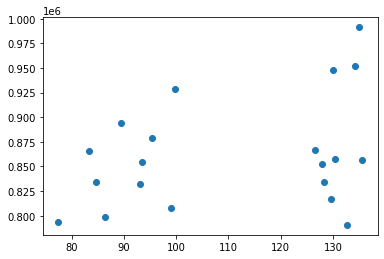

In [ ]:
# Women Scatter Plot
womenMeanSmarts = womendf[['PIQ', 'FSIQ', 'VIQ']].mean(axis = 1)
plt.scatter(womenMeanSmarts, womendf['MRI_Count'])
plt.show()
%matplotlib inline

In [ ]:
mendf.corr(method = 'pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


In [ ]:
womendf.corr(method = 'pearson')

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


<AxesSubplot:>

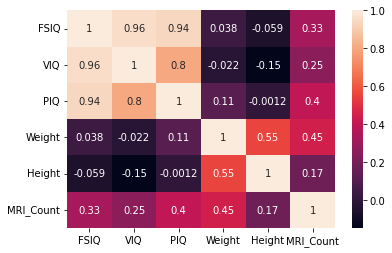

In [ ]:
wcorr = womendf.corr()
sns.heatmap(wcorr,annot=True)

<AxesSubplot:>

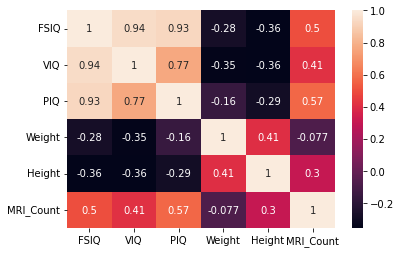

In [ ]:
mcorr = mendf.corr()
sns.heatmap(mcorr,annot=True)